In [1]:
import math
import numpy as np
import openslide
import matplotlib.pyplot as plt
import pandas as pd

import os

In [2]:
PATH_TO_DATASET = "/deep/group/aihc-bootcamp-fall2021/lymphoma/raw"
PATH_TO_IMAGES = os.path.join(PATH_TO_DATASET, "svs")
PATH_TO_ANNOTATIONS_CSV = os.path.join(PATH_TO_DATASET, "cores")
NUM_SAMPLES = 5

In [3]:
# Generated annotations file from 1010900_TMA1_annotated.qpdata.
PATH_TO_TMA_ANNOTATION = os.path.join(PATH_TO_ANNOTATIONS_CSV, "TMA4_annotations.csv")
PATH_TO_TMA_IMAGE = os.path.join(PATH_TO_IMAGES, "1010903_TMA4.svs")

## Read and Show a Single Tissue Core from a TMA

In [4]:
tma = openslide.OpenSlide(PATH_TO_TMA_IMAGE)

In [5]:
# These values are obtained from 1010900_TMA1_annotated.qpdata.
# Does not work for other TMAs like TMA4
x = 13046
y = 6695
width = 2699
height = 2813

In [6]:
patch = tma.read_region([x, y], 0, [width, height]).convert('RGB')

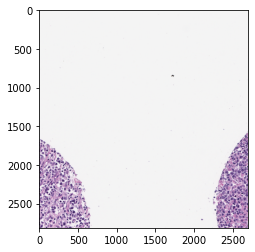

In [7]:
plt.imshow(patch)

## Read All Tissue Cores in TMA1 

In [8]:
tma_annotations = pd.read_csv(PATH_TO_TMA_ANNOTATION)

In [9]:
tma_annotations.head()

,Name,X,Y,Width,Height
0,E0456B,58606.0,11670.0,1308.0,1197.0
1,E0427B,7151.0,25038.0,2914.0,2847.0
2,E0413B,24078.0,28996.0,2789.0,2923.0
3,E0451C,11307.0,16494.0,2802.0,2886.0
4,E0415B,15512.0,29384.0,2789.0,2748.0


In [10]:
# Store 'num_images_to_read' tissue cores in tma_patches.
num_images_to_read = 10
tma_patches = []
tma = openslide.OpenSlide(PATH_TO_TMA_IMAGE)
for index, row in tma_annotations.iterrows():
    if index > num_images_to_read:
        break
    x, y, width, height = int(row["X"]), int(row["Y"]), int(row["Width"]), int(row["Height"])
    patch = tma.read_region([x, y], 0, [width, height]).convert('RGB')
    tma_patches.append(patch)

In [11]:
def plot_samples(patches, num_samples=NUM_SAMPLES):
    if num_samples > len(patches):
        raise ValueError("Can not plot more samples than the number of patches there are.")
        
    indices = np.arange(len(patches))
    np.random.shuffle(indices)
    
    for i in range(num_samples):
        ii = indices[i]
        plt.imshow(patches[ii])
        plt.show()

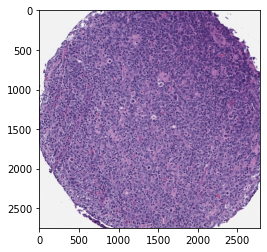

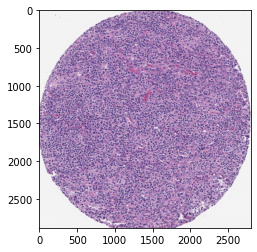

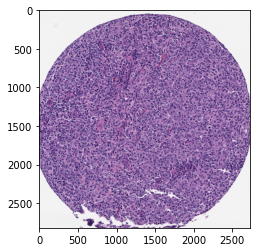

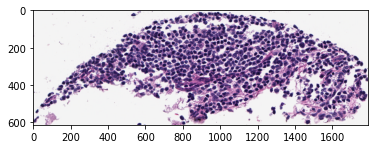

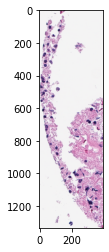

In [12]:
plot_samples(tma_patches)